In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/saurabhtayal/Capstone-Project---Diabetic-Patients-Readmission-Prediction/master/Diabetes_clean2.csv')
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,preceding_year_visits,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),Not Available,Not Available,Referral,1,41,0,1,0,Diabetes,Not Required,Not Required,1,None,None,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency,3,59,0,18,0,"Endocrine, Nutritional, Metabolic, Immunity",Diabetes,"Endocrine, Nutritional, Metabolic, Immunity",9,None,None,No,No,No,No,No,No,No,Up,Ch,Yes,NO
2,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency,2,11,5,13,3,"Pregnancy, Childbirth",Diabetes,External causes of injury,6,None,None,No,No,No,Steady,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency,2,44,1,16,0,Infectious and Parasitic,Diabetes,Circulatory,7,None,None,No,No,No,No,No,No,No,Up,Ch,Yes,NO
4,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency,1,51,0,8,0,Neoplasms,Neoplasms,Diabetes,5,None,None,No,No,No,Steady,No,No,No,Steady,Ch,Yes,NO


In [3]:
df_meds = pd.DataFrame()
for i in ['metformin',
       'repaglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin']:
    df_meds[i] = df[i].replace({'No' : -2,
                               'Down' : -1,
                               'Steady' : 0,
                               'Up' : 1})

In [4]:
df_meds.head()

,metformin,repaglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin
0,-2,-2,-2,-2,-2,-2,-2,-2
1,-2,-2,-2,-2,-2,-2,-2,1
2,-2,-2,-2,0,-2,-2,-2,-2
3,-2,-2,-2,-2,-2,-2,-2,1
4,-2,-2,-2,0,-2,-2,-2,0


In [5]:
inertia = []
sil = []
k = list(range(2, 10))
for i in k:
    km = KMeans(n_clusters = i, precompute_distances = True, random_state = 0, n_jobs = -1)
    km.fit(df_meds, )
    labels = km.labels_
    inertia.append(km.inertia_)
    sil.append(silhouette_score(df_meds, labels))
clust_df = pd.DataFrame({'n_clusters' : k, 'inertia' : inertia, 'sil_score' : sil})
clust_df

,n_clusters,inertia,sil_score
0,2,249707.900229,0.358635
1,3,202964.671709,0.399657
2,4,176068.882094,0.431483
3,5,154502.850310,0.459282
4,6,144765.632959,0.472543
5,7,129661.322264,0.502183
6,8,116201.758504,0.522488
7,9,108287.775925,0.537481


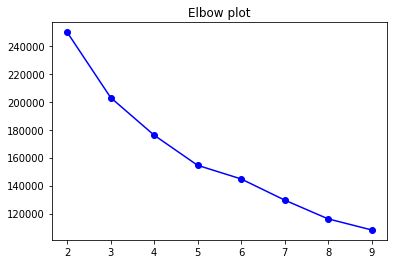

In [6]:
plt.plot(clust_df.n_clusters, clust_df.inertia, marker = 'o', c = 'b')
plt.title("Elbow plot")
plt.show()

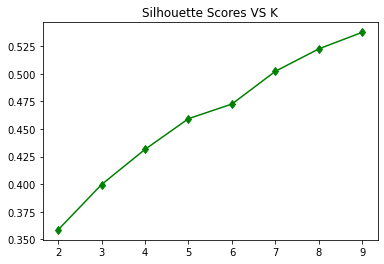

In [7]:
plt.plot(clust_df.n_clusters, clust_df.sil_score, marker = 'd', c = 'g')
plt.title('Silhouette Scores VS K')
plt.show()